# Introduction

This notebook is a motivational introduction to artificial neural networks (aka <i>neural nets</i>). We'll explore what they are, why they were created, how they work, and finally we'll create one that can recongize hand-written digits with a very high degree of accuracy.

First let's talk about why neural nets were created in the first place. Prior to neural nets, computers could easily outperform people at tasks such as arithmatic, but were unable to do a decent job at many tasks that people found easy such as image recognition and natural language processing. As a simple example, consider the following set of images of hand-written digits:
<center><img src="images/MNIST-digits.jpg"/></center>

Each one of the images above is a 25x25 grid of light intensities. Each element in the grid is called a <i>pixel</i>, which is short for picture element. Imagine trying to write a computer program to figure out what digit each picture represents; "if pixel at location (2,3) > minimum_intensity and ... then output 1" (or some such). It would be impossible, right?

And the problem can be even harder for more complex images:
<center><img src="images/Chihuahua-or-muffin.jpg"/></center>

To solve these problems, people came up with the idea of creating computer programs that work more like a brain; instead of creating code that is specific to a given problem, they create code that models a simple brain. They then train that brain by showing it data so it learns a specific task (like reconginizing hand-written digits, or distinguishing a chihuahua from a muffin); similar to how people learn. Let's look at how this works in more detail.

# Artificial Neural Networks

Per the picture below, each neuron in your brain takes inputs to it's <i>dendtrites</i> and, if the input signals are high enough, fires an output to it's <i>axon</i>.
<center><img src="images/Neuron.jpg"/></center>

The human brain is made up of about 100 billion interconnected neurons, each with about 1000 connections to other neurons, for about 100 trillion neural connections! The connection between one neurons output axon and another neurons input dentrite is called a <i>synaptic connection</i>. All of your memories and knowledge and skills are encoding in the stength of the synaptic connections between your neurons. Learning is just the brain creating, strengthening, or weakening the 100 trillion synaptic connections between your neurons.

Pictured below is an artificial neuron, which is modeled as a set of inputs (corresponding to dentrites), a set of weights to apply to each input (corresponding to synaptic stengths), and an output (corresponding to the axon). The artificial neurons weights can be adjusted to allow it to <i>learn</i>:
<center><img src="images/Artificial-neuron.jpg"/></center>

Here's a quick summary of some of the key differences between the human brain and artificial neural networks:
<table>
<tr>
 <th/>
 <th>Human Brain</th>
 <th>Artificial</th>
</tr>
<tr>
 <td>Size</td>
 <td>100 trillion synaptic connections</td>
 <td>200 billion parameters for a very large network like ChatGPT, although small neural nets like we'll build may have just a few hundred neurons.</td>
</tr>
<tr>
 <td>Speed</td>
 <td>Hundreds of operations per second</td>
 <td>Billions of operations per second</td>
</tr>
<tr>
 <td>Parallelism</td>
 <td>All signals run in parallel</td>
 <td>CPUs can only a very small number of operations at a time. High end GPUs can run millions of operations to run at a time, but only if all the operations are the same</td>
</tr>
</table>

On a creepy note, researchers have also experimented with creating <a href="https://research.ufl.edu/publications/explore/v10n1/extract2.html">neural nets from rat brains</a> and, after a number of studies, discovered that the rats don't like these experiments. For more information, please read <a href='https://towardsdatascience.com/the-differences-between-artificial-and-biological-neural-networks-a8b46db828b7'>artifical vs biological neural networks</a>.

# Introducting the MNIST data set and TensorFlow

We'll train a neural network to recognize hand-written digits. To do that, we'll need::
1) A framework for creating neural networks. We'll use TensorFlow, created by Google (Meta's PyTorch is another popular framework, but is a bit more complicated).
2) A dataset of labeled images of digits. By a labeled image, we mean both the image (a 28x28 grid of pixels) and the label (the actual number that was drawn in the image; 0, 1, ..., 9). We'll use the MNIST dataset, which contains a large set of labeled images for training the neural net, and another set of labeled images to test how the neural net performs on images it has never seen before.

In [ ]:
# Run this code cell (and later the ones below) using the icon to the left of the cell, or by pressing Shift+Enter

import tensorflow as tf
import matplotlib.pyplot as plt

train, test = tf.keras.datasets.mnist.load_data()   # Load the MNIST dataset
train_images, train_labels = train                  # Put the training images and labels in separate variables

# Normalize the images
train_images = train_images / 255.0

# Show the first 20 images and their corresponding labels
plt.figure(figsize=(10,10)) # Make is larger (10x10 inches) so you can see the pixels better
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap='gray_r')      # Show the image in reverse grayscale
    plt.xlabel(train_labels[i])                     # Show the label underneath the image
# Add text to the top of the figure saying it's the first 20 images
plt.suptitle(f"The MNIST training data consists of {train_images.shape[0]} images, each of size {train_images.shape[1:]}.\nHere are the first 20:")
plt.show()

Let's create a simple 3-layer neural net for processing the images:
<center><img src="images/3-layer-net.jpg"/></center>

We'll use the following three layers:
1) Input: Takes a 2d 28x28 image (28x28 grid of light intensitities) and flattens it to a 1-dimensional vector of 784 light intensities (784 = 28x28)
2) Hidden: Takes 784 inputs from the previous layer and creates 16 outputs (so it has 16 'neurons', each getting full input from the previous layer) 
3) Output: Takes the 16 inputs and outputs 10 probabilities; the percent chance the network assigns to the image being each of the 10 possible digits)

Let's create this neural network and see how well it does at recognizing the images...

1875/1875 [==============================] - 2s 836us/step


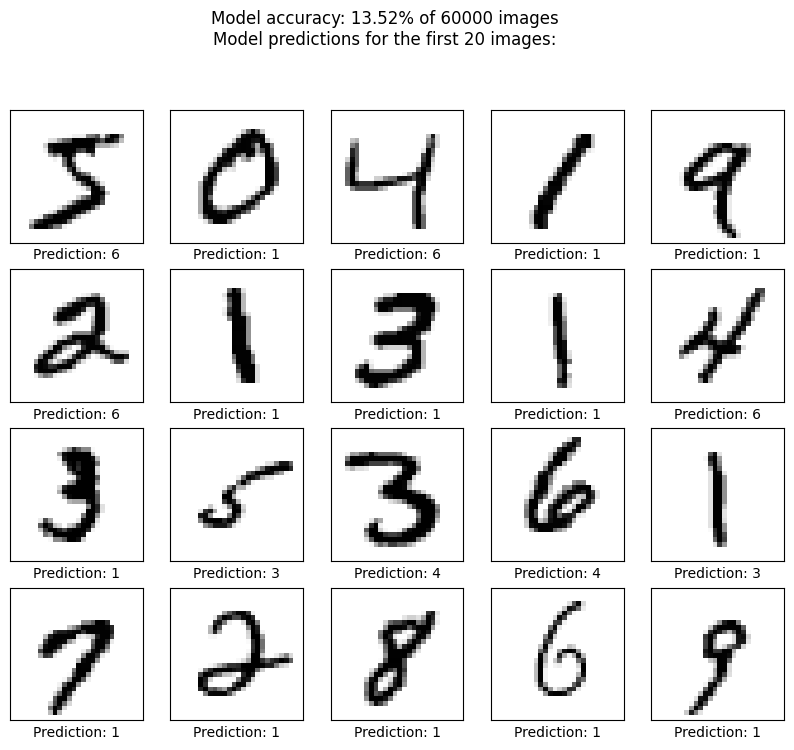

In [6]:
neural_net = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name="Input"),    # Flatten the 28x28 images to a 1D array of 784 pixels
    tf.keras.layers.Dense(16, activation='relu, name="Hidden"'),    # Does some calculations across input pixels
    tf.keras.layers.Dense(10, activation='softmax', name="Output")  # Predicts a probability for each digit
])
neural_net.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

def show_predictions (images, labels, model):
    predictions = model.predict(images) # Predict the labels for each images

    # Calculate the accuracy by seeing how many of the predictions were correct
    accuracy = sum([predictions[i].argmax() == labels[i] for i in range(len(labels))]) / len(labels)

    # Show the first 20 images and their corresponding predictions
    plt.figure(figsize=(10,10)) # Make is larger (10x10 inches) so you can see the pixels better
    for i in range(20):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(images[i], cmap='gray_r')                    # Show the images in reverse grayscale (black on white)
        plt.xlabel(f"Prediction: {predictions[i].argmax()}")    # Show the label underneath the image
    plt.suptitle(f"Model accuracy: {accuracy:.2%} of {images.shape[0]} images\nModel predictions for the first 20 images:")
    plt.show()

show_predictions(train_images, train_labels, neural_net)

Wow - that was stunningly bad. Why do you think that is?

Well, the model is initialized with random weights for the neural connections, so it's predictions are just random guesses. So it will typically have about 10% accuracy (because there are 10 digits, there is a 1 in 10 chance that a random guess will be the right answer). Try running the cell multiple times and you will see it's accuracy will be different each time, but typically in the 5%-15% range.

To make the model work better, we first need to train it. Let's see how that works...

Model: "simple_neural_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden_layer (Dense)        (None, 16)                12560     
                                                                 
 output_probabilities (Dense  (None, 10)               170       
 )                                                               
                                                                 
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________
None
1875/1875 [==============================] - 1s 759us/step


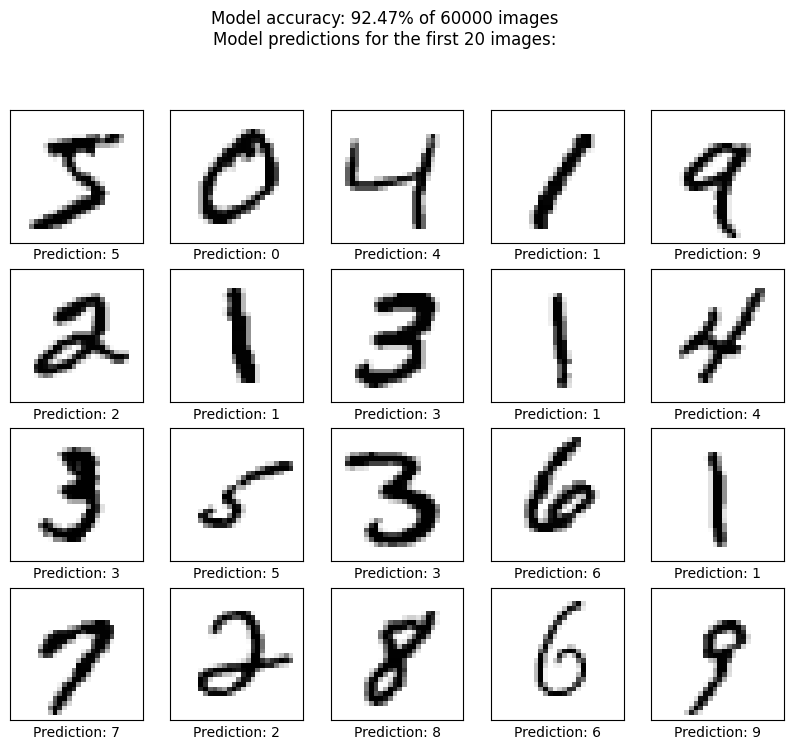

313/313 [==============================] - 0s 987us/step


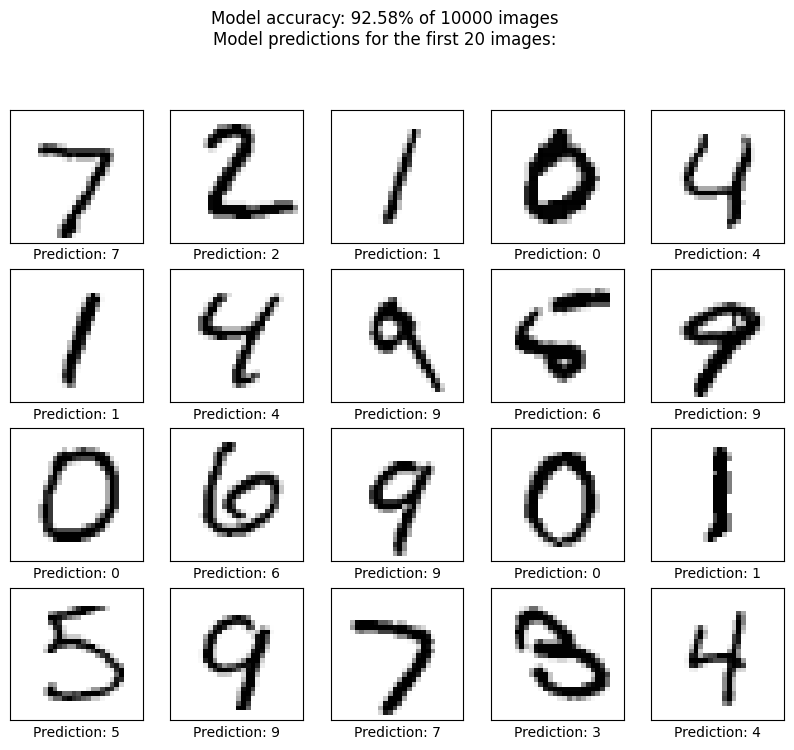

In [7]:
# First print out a summary of all the weights (aka 'parameters') in the neural network that are going to be trained
print (neural_net.summary())    # You will see there are about 13,000 parameters in this neural network

# Next, train the neural network on the training data (epochs=1 means it will go through the training data once)
neural_net.fit(train_images, train_labels, epochs=1)

# Now let's see how good it is at predictions on the data it was trained on:
show_predictions(train_images, train_labels, neural_net)

# Let's also see how good it is at predicitons on the test data set, which it has never seen before and was not trained on
test_images, test_labels = test
test_images = test_images / 255.0
show_predictions(test_images, test_labels, neural_net)

Well, that's much better - we're now around 92% accuracy on both the training images and test images!

In general, the "test" accuracy is what you care about, since it is predicting on images it has not seen before. If your neural net has much higher training accuracy than test accuracy, it means it is "overfitting" to the training data - a very common thing but it's not happening here.

# You try it

Try to optimize the neural net so it's accuracy is over 97%. Modify the TODO's below to try combinations of:
* **Longer training** - increase the EPOCHS (aka, the number of passes are done on the training data)
* **A wider network** - increase the number of neurons in the hidden layer from 16 (e.g., try 32, 64, 128))
* **A deeper network** - add another hidden layer


Run things with different combinations and see what gives you the best results.

Prepare to discuss afterwards: which optimizations were the most important for this application?

In [ ]:
EPOCHS=1    # TODO - try different values for the epochs

# Try creating a more complex network, deeper (more layers), wider (more neurons in the hidden layers),
# or adding 'dropout' layers to prevent overfitting the training data, which will improve test accuracy
neural_net = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),      # Input layer
    # TODO - modify the layers below this line
    tf.keras.layers.Dense(16, activation='relu'),       # Hidden layer(s)
    # TODO - end of modifications
    tf.keras.layers.Dense(10, activation='softmax')     # Output layer
], name='more_complex_neural_net')
neural_net.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # TODO - try the 'adam' optimizer

# First print out a summary of all the weights in ther neural network that are going to be trained
print (neural_net.summary())

# Train the network longer (more epochs)
history = neural_net.fit(train_images, train_labels, epochs=EPOCHS)

# Let's see if that improves the test accuracy
show_predictions(test_images, test_labels, neural_net)

# To learn more
If you want to learn more about how to create neural nets, here are some resouces:
* [**Kaggle learn**](https://www.kaggle.com/learn): Kaggle is a great resource for learning data science, which includes community, competitions, and short self-paced classes, and it's all free. A good sequence of their classes; into to Python (if you don't know the basics), intro to machine learning (basic concepts for all machine learning techniques), intro to deep learning (neural nets). Computer vision is a quick dive into neural nets specifically built for vision tasks (called convolution neural nets)
* [**Andrew Ng's Machine Learning coursera class**](https://www.coursera.org/specializations/machine-learning-introduction): A great introduction to the various machine learning techniques (besides neural nets) that have been around for a long time.
* [**Andrew Ng's Deep learning specialization**](https://www.coursera.org/specializations/deep-learning): A series of more advanced classes that will show you how to build neural nets for vision problems (CNN's, like facial recognition) and sequential models (LLM's, like ChatGPT). "Deep learning" is just another term for neural nets that have many layers.